In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
import yfinance as yf

from model.PDV import *
from model.HMM import *
from model.data import *

# Data

In [2]:
window = 1000
log_return = True
predict_t_plus_1 = False

In [3]:
start_date = pd.to_datetime('1995-01-01')
end_date = pd.to_datetime('2023-08-31')
spx_data = pd.read_csv('./data/spx_data_nn.csv', index_col=0, parse_dates=[0])
vix_data = pd.read_csv('./data/vix_data_nn.csv', index_col=0, parse_dates=[0])
spx_data.index = pd.to_datetime(pd.to_datetime(spx_data.index, utc=True).date)
vix_data.index = pd.to_datetime(pd.to_datetime(vix_data.index, utc=True).date)
data = create_df_from_yf(spx_data, start_date, end_date, vix_data, predict_t_plus_1=predict_t_plus_1, log_return=log_return)
data

,r1,r2,vix
1995-01-04,0.003479,1.210315e-05,0.1353
1995-01-05,-0.000803,6.454842e-07,0.1350
1995-01-06,0.000738,5.450927e-07,0.1313
1995-01-09,0.000326,1.059759e-07,0.1333
1995-01-10,0.001843,3.395957e-06,0.1252
...,...,...,...
2023-08-24,-0.013549,1.835850e-04,0.1720
2023-08-25,0.006696,4.482973e-05,0.1568
2023-08-28,0.006245,3.900101e-05,0.1508
2023-08-29,0.014404,2.074772e-04,0.1445


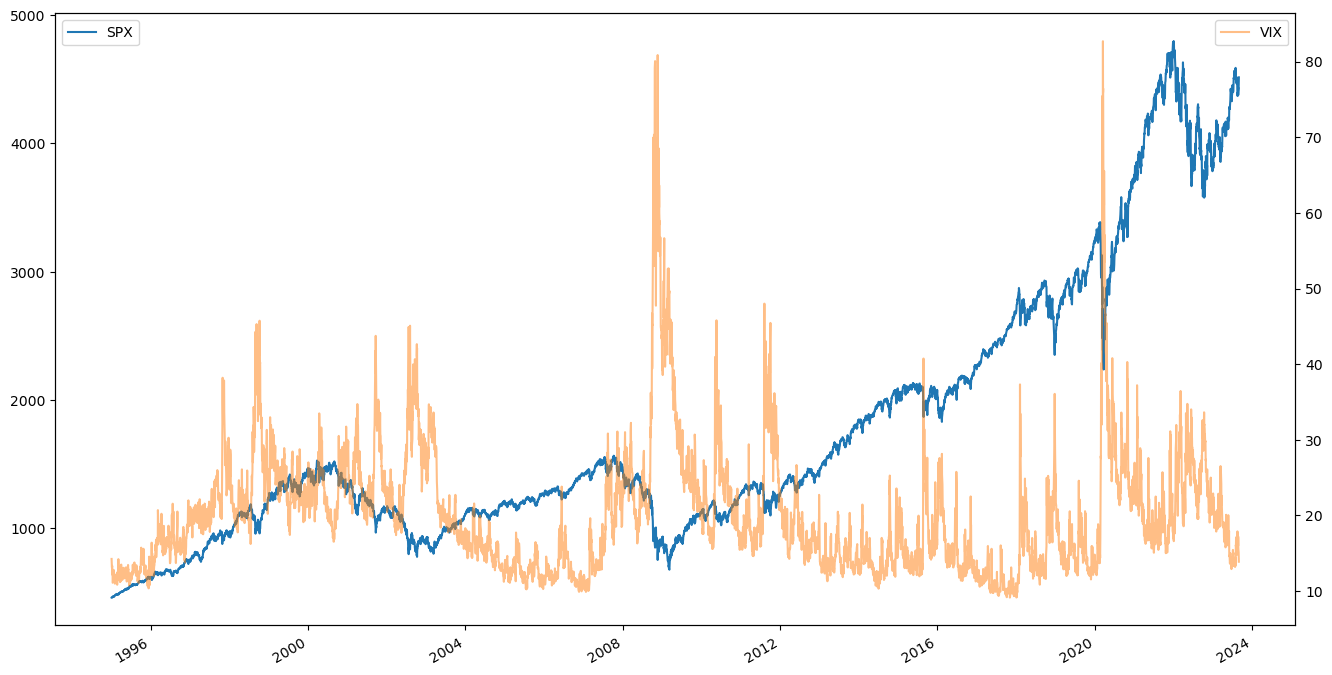

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
spx_data[['Close']].plot(ax=ax, label='SPX')
ax2 = vix_data[['Close']].plot(ax=ax, label='VIX', secondary_y=True, alpha=0.5)
ax.legend(labels=['SPX'], loc='upper left')
ax2.legend(labels=['VIX'], loc='upper right')

In [5]:
# merged_df = pd.merge(spx_data['Close'], vix_data['Close'] / 100, left_index=True, right_index=True, )
# merged_df.rename(columns={'Close_x': 'SPX', 'Close_y': 'VIX'}, inplace=True)
# merged_df.to_csv('./data/spx_vix_df.csv')
# merged_df

# HMM for SPX

## Irregular time periods

In [6]:
for n in range(2, 2): # set end range to 2 to stop code running
    n_regimes = n
    spx_models = []
    print(f'Number of regimes: {n_regimes}')

    for i in range(1, 6):
        print(f'Run {i}')
        spx_model = IrregularPeriodsHMM(n_regimes, verbose=False)
        print(f'Initial parameters μ: {spx_model.μ}, σ: {spx_model.σ}, π: {np.exp(spx_model.π)}, A: \n{np.exp(spx_model.A)}')
        spx_model.EM_optimise(spx_data, tol=1e-7)
        spx_models.append(spx_model)
        spx_model.print_params()

        # save params to dataframe and csv
        spx_model.save_params_to_csv('./dataparams.csv', i)
        print('----------------------------------')

In [7]:
df = pd.read_csv('./data/params_v1.csv', index_col=0, converters={'μ': from_np_array, 'σ': from_np_array,
                                                        'π': from_np_array, 'A': from_np_array,
                                                        'π_alpha': from_np_array, 'A_alpha': from_np_array})
df

,n_regimes,model,μ,σ,π,A,log_likelihood
0,2,1,"[0.26033976, 0.01488166]","[0.12631492, 0.26073531]","[0.54751681, 0.45248319]","[[0.00702196, 0.99297804], [0.90095488, 0.0990...",-72881.316049
0,2,2,"[0.34174416, -0.12416645]","[0.08952189, 0.2930143]","[0.89346575, 0.10653425]","[[0.74519385, 0.25480615], [0.24459404, 0.7554...",-72167.893093
0,2,3,"[-0.37957292, 0.29332834]","[0.36678685, 0.11853461]","[0.00361386, 0.99638614]","[[0.5921114, 0.4078886], [0.11878126, 0.881218...",-72092.517076
0,2,4,"[-0.26071205, 0.29361444]","[0.34089722, 0.11344707]","[0.0684883, 0.9315117]","[[0.18376854, 0.81623146], [0.34843363, 0.6515...",-72355.024308
0,2,5,"[0.0358044, 0.29851117]","[0.2528692, 0.0843239]","[0.18521356, 0.81478644]","[[0.60007353, 0.39992647], [0.79092979, 0.2090...",-72570.743801
0,2,6,"[0.30461596, -0.29842837]","[0.11401403, 0.34320322]","[0.97146354, 0.02853646]","[[0.90030302, 0.09969698], [0.26129444, 0.7387...",-71990.861791
0,2,7,"[0.28504647, 0.03211657]","[0.0749784, 0.2598065]","[0.96132298, 0.03867702]","[[0.29564708, 0.70435292], [0.39890494, 0.6010...",-72451.546374
0,2,8,"[-0.38042628, 0.28958843]","[0.36960988, 0.11896809]","[0.79967455, 0.20032545]","[[0.23121995, 0.76878005], [0.23809688, 0.7619...",-72238.098646
0,2,9,"[-0.09859517, 0.30998338]","[0.29714604, 0.08947238]","[0.04984242, 0.95015758]","[[0.52531274, 0.47468726], [0.40728968, 0.5927...",-72230.751789
0,2,10,"[0.10543052, 0.13252655]","[0.17561721, 0.21336171]","[0.39384082, 0.60615918]","[[0.60007241, 0.39992759], [0.05609407, 0.9439...",-73406.938671


In [8]:
n_regimes = 4
model_num = 3
spx_model = IrregularPeriodsHMM(n_regimes, verbose=False)
spx_model.load_params_from_csv('./data/params_v1.csv', model_num)
spx_model.predict(spx_data)

Loaded parameters from ./data/params_v1.csv


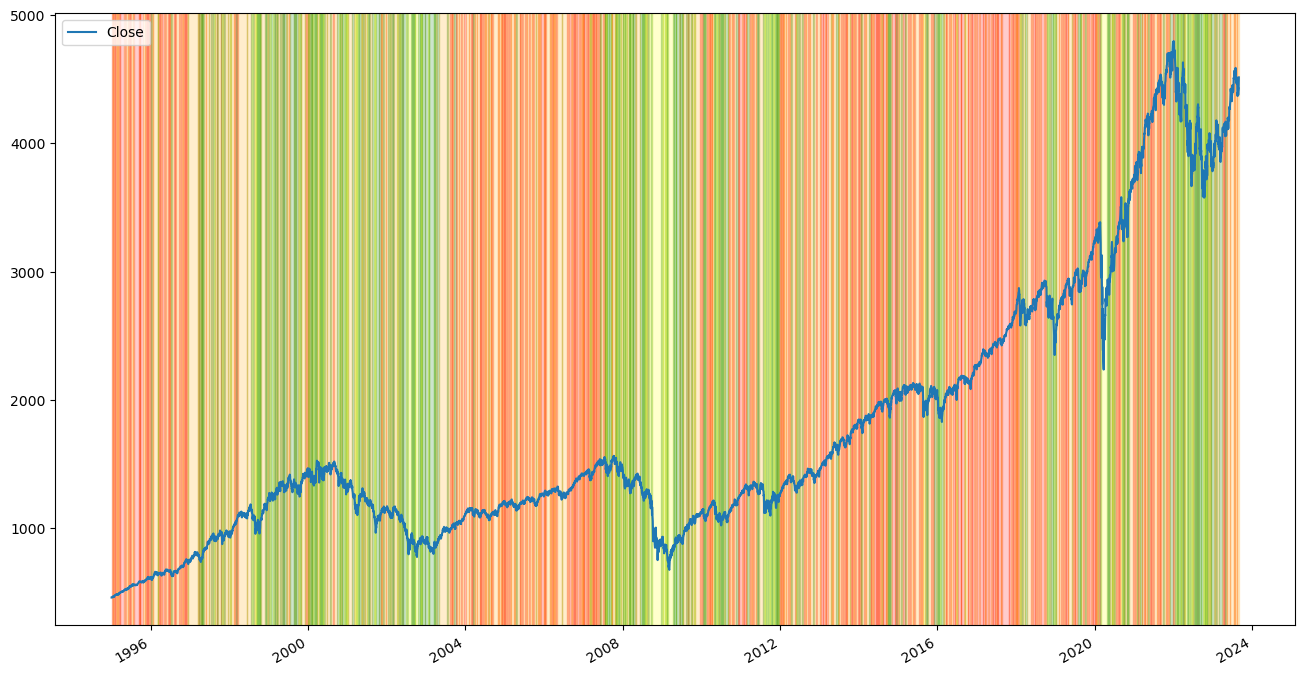

In [9]:
spx_model.plot_regimes_on_index()

## Regular time periods (using hmmlearn)

### Using SPX + UKX + DAX to train

In [10]:
# start_date = pd.to_datetime('1995-01-01')
# end_date = pd.to_datetime('2023-08-31')
# tickers = ['^GSPC', '^FTSE', '^GDAXI']
# # download data from yahoo finance
# hmm_data = yf.download(tickers, start=start_date, end=end_date, progress=False)
# hmm_data = hmm_data['Adj Close']
# hmm_data.dropna(inplace=True)
# hmm_data = hmm_data / hmm_data.iloc[0]
# hmm_data = hmm_data[tickers] # reorder columns so that first column is SPX

In [15]:
hmm_data = pd.read_csv('./data/spx_ukx_dax_data.csv', index_col=0, parse_dates=[0])
hmm_data

,^GSPC,^FTSE,^GDAXI
Date,,,
1995-01-03,1.000000,1.000000,1.000000
1995-01-04,1.003485,0.995401,1.001924
1995-01-05,1.002679,0.989105,0.991561
1995-01-06,1.003420,0.999772,0.994819
1995-01-09,1.003746,0.996771,0.992503
...,...,...,...
2023-08-23,9.662194,2.387872,7.602232
2023-08-24,9.532160,2.392145,7.550553
2023-08-25,9.596197,2.393776,7.555546


Model score: 70871.8527
Model score: 70826.9822


Model is not converging.  Current: 70918.74205540438 is not greater than 70918.74239441. Delta is -0.0003390056226635352


Model score: 70918.7402


Model is not converging.  Current: 70830.64106494059 is not greater than 70830.64283791833. Delta is -0.001772977746441029


Model score: 70830.4801
Model score: 70877.1861


Model is not converging.  Current: 70828.88348040683 is not greater than 70828.94114372351. Delta is -0.05766331667837221


Model score: 70877.0080
Model score: 70828.6962


Model is not converging.  Current: 70979.00615738294 is not greater than 70979.0611873766. Delta is -0.055029993658536114


Model score: 70978.8636
Best model: 7
Regime 0 count: 1176
Regime 1 count: 2583
Regime 2 count: 201
Regime 3 count: 3037
μ: [[-0.08234265 -0.09070563 -0.14622209]
 [-0.02055588  0.00128185 -0.00273559]
 [-0.49778343 -0.65452549 -1.04411717]
 [ 0.32362131  0.19660463  0.37042518]]
σ: [[0.26421771 0.26071546 0.34393781]
 [0.17427905 0.16344337 0.2083002 ]
 [0.62956749 0.54834459 0.63736444]
 [0.09270716 0.09929133 0.12600984]]
Drift: [[-0.11724815 -0.12469191 -0.20536869]
 [-0.03574247 -0.01207501 -0.02443008]
 [-0.69596104 -0.80486638 -1.24723389]
 [ 0.319324    0.19167524  0.36248594]]
Transition:
[[9.42086780e-01 3.86754399e-02 1.87816022e-02 4.56177399e-04]
 [1.87347533e-02 9.21985508e-01 3.50405108e-06 5.92762349e-02]
 [1.14346470e-01 5.80015720e-18 8.85643514e-01 1.00157832e-05]
 [1.55740910e-08 5.14933179e-02 1.98553727e-22 9.48506666e-01]]
Initial state distribution: [3.67927694e-197 2.68746572e-067 0.00000000e+000 1.00000000e+000]


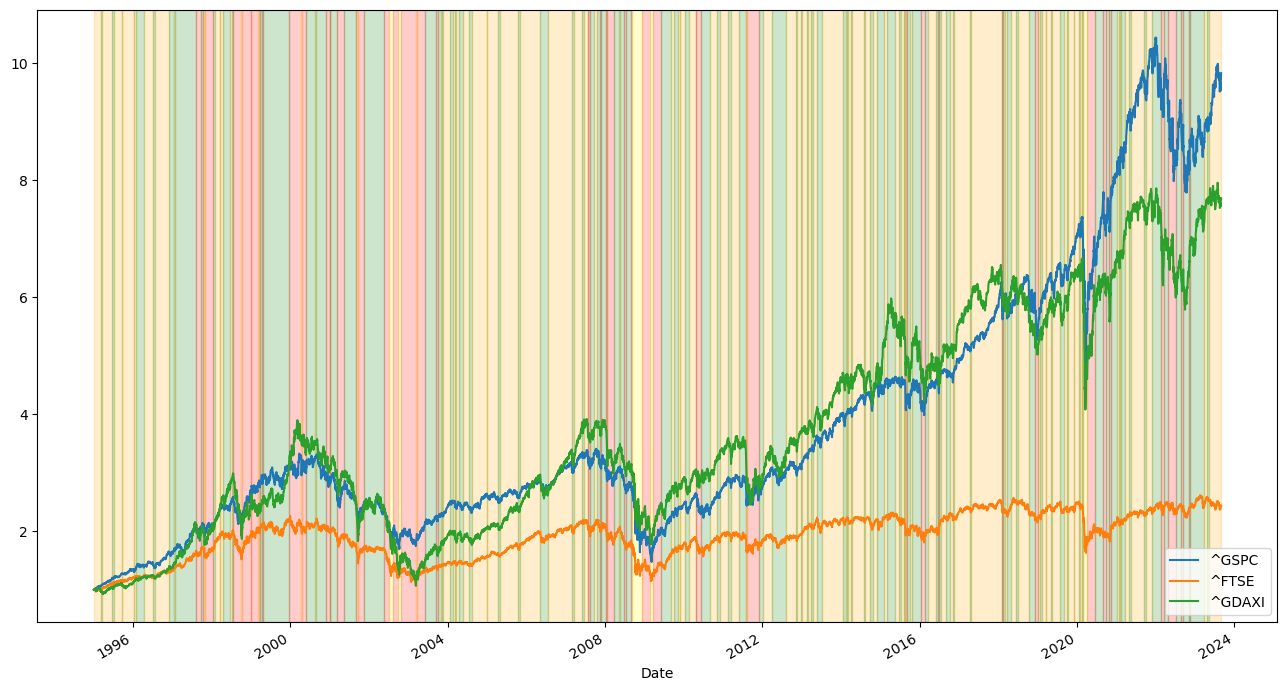

In [16]:
n_regimes = 4
n_models = 8
spx_model = RegularPeriodsHMM(n_regimes, n_models=8, verbose=False)
spx_model.fit(hmm_data, hmm_data.columns)

### Using SPX alone

Model is not converging.  Current: 23342.65164503988 is not greater than 23343.019064606873. Delta is -0.3674195669918845


Model score: 23342.0778
Model score: 23331.8427


Model is not converging.  Current: 23056.853230772093 is not greater than 23056.854963177368. Delta is -0.00173240527510643


Model score: 23056.8450
Model score: 23055.0502
Model score: 23316.3478
Model score: 23342.0894
Model score: 23335.3112
Model score: 23341.4692
Best model: 5
Regime 0 count: 4294
Regime 1 count: 315
Regime 2 count: 1322
Regime 3 count: 1283
μ: [ 0.26057408 -0.63607855 -0.4591078   0.45834331]
σ: [0.09968246 0.56925302 0.23659957 0.17913475]
Drift: [ 0.25560579 -0.79810305 -0.48709748  0.44229868]
Transition:
[[9.83072111e-01 3.56692667e-04 1.61601625e-02 4.11033565e-04]
 [1.65296917e-52 9.50704061e-01 1.50067079e-02 3.42892311e-02]
 [5.04809047e-06 2.61397438e-03 1.81684756e-01 8.15696221e-01]
 [4.62104580e-02 6.06717311e-03 9.11534307e-01 3.61880621e-02]]
Initial state distribution: [1.00000000e+000 0.00000000e+000 4.35841286e-181 1.11671114e-138]


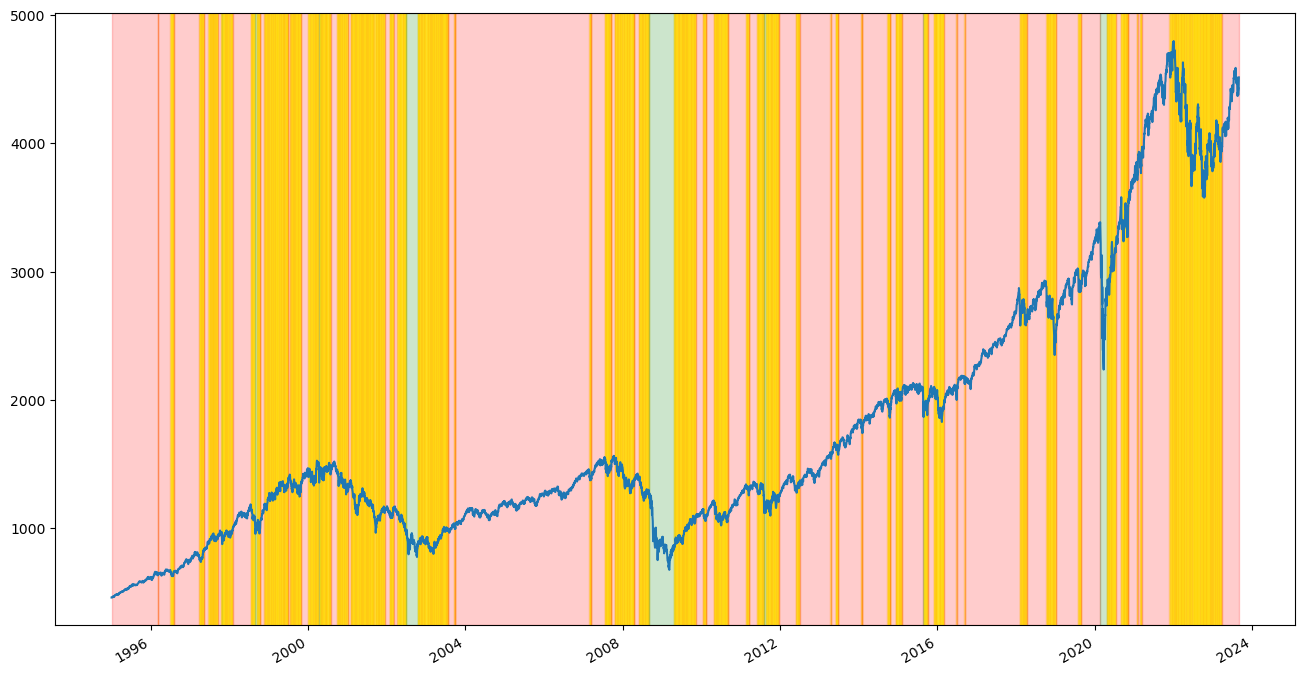

In [11]:
n_regimes = 4
n_models = 8
spx_model = RegularPeriodsHMM(n_regimes, n_models=8, verbose=False)
spx_model.fit(spx_data)

### Simulate

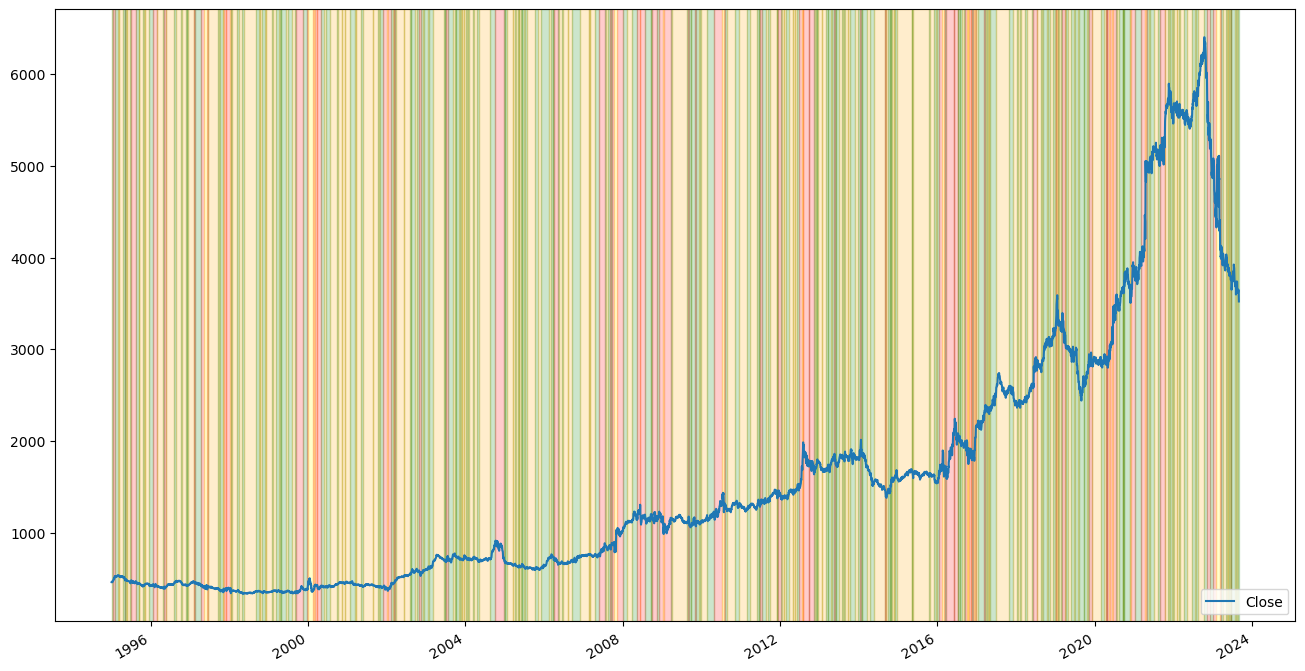

In [18]:
sim_df = spx_model.simulate(spx_data.loc[spx_data.index[0], 'Close'], spx_data.index)

# PDV model for VIX

In [19]:
pdv_initial_params = [0.054, -0.078, 0.82, 52.8, 3.79, 0.81, 17.3, 1.16, 0.43]
vix_model = PDV2Exp(pdv_initial_params)
lower_bound = [-np.inf, -np.inf, -np.inf, 0., 0., 0., 0., 0., 0.]
upper_bound = [np.inf, np.inf, np.inf, np.inf, np.inf, 1., np.inf, np.inf, 1.]
vix_model.optimise(data, window, lower_bound=lower_bound, upper_bound=upper_bound)
print(vix_model.params)
vix_model.evaluate(data, window)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.9078e+00                                    3.06e+01    
       1              2         1.7759e+00      1.32e-01       3.63e+00       1.18e+01    
       2              3         1.7013e+00      7.46e-02       2.94e+00       2.39e-01    
       3              4         1.7002e+00      1.04e-03       1.46e+00       4.28e-01    
       4              5         1.7001e+00      1.68e-04       2.17e+00       4.07e-02    
       5              6         1.7000e+00      1.75e-05       8.13e-01       1.12e-02    
       6              7         1.7000e+00      4.01e-06       5.28e-01       3.32e-03    
       7              8         1.7000e+00      1.22e-06       2.84e-01       9.84e-04    
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 1.9078e+00, final cost 1.7000e+00, first-order optimality 9.84e-04.
[ 5.40639378e-02 -5.64113523e-02 

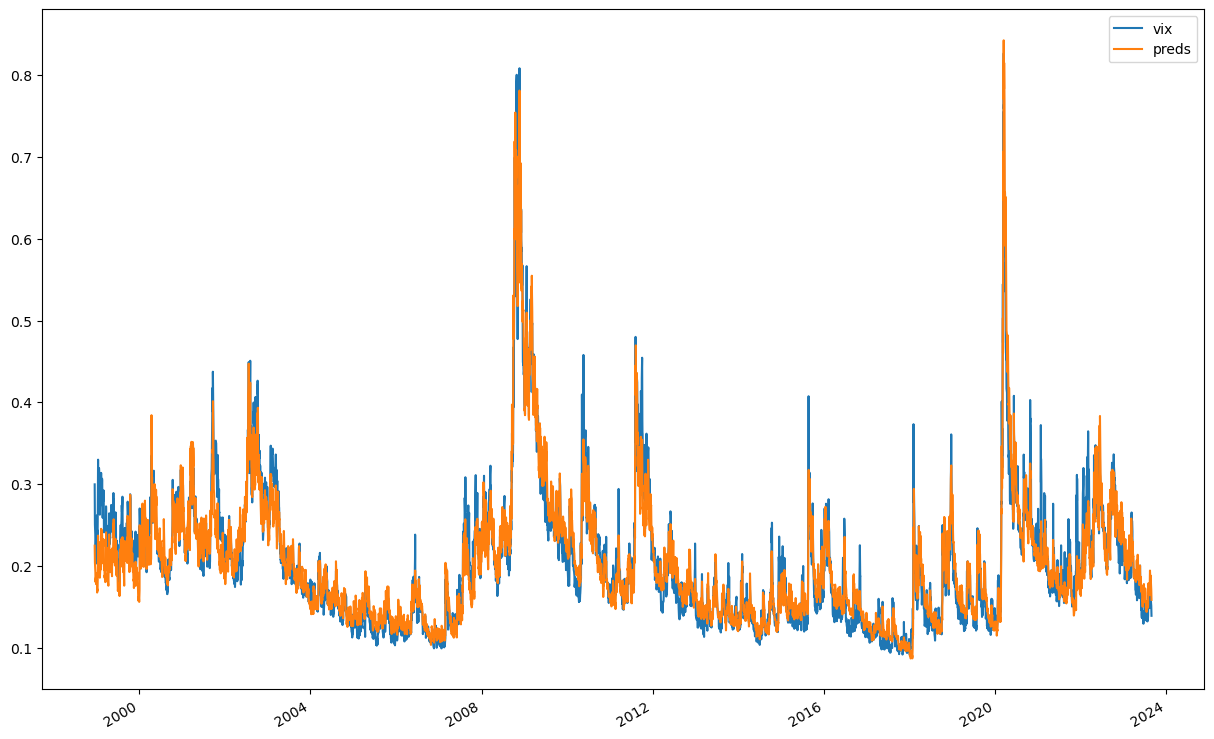

In [20]:
vix_model.plot(data, window)

# Simulate SPX + VIX

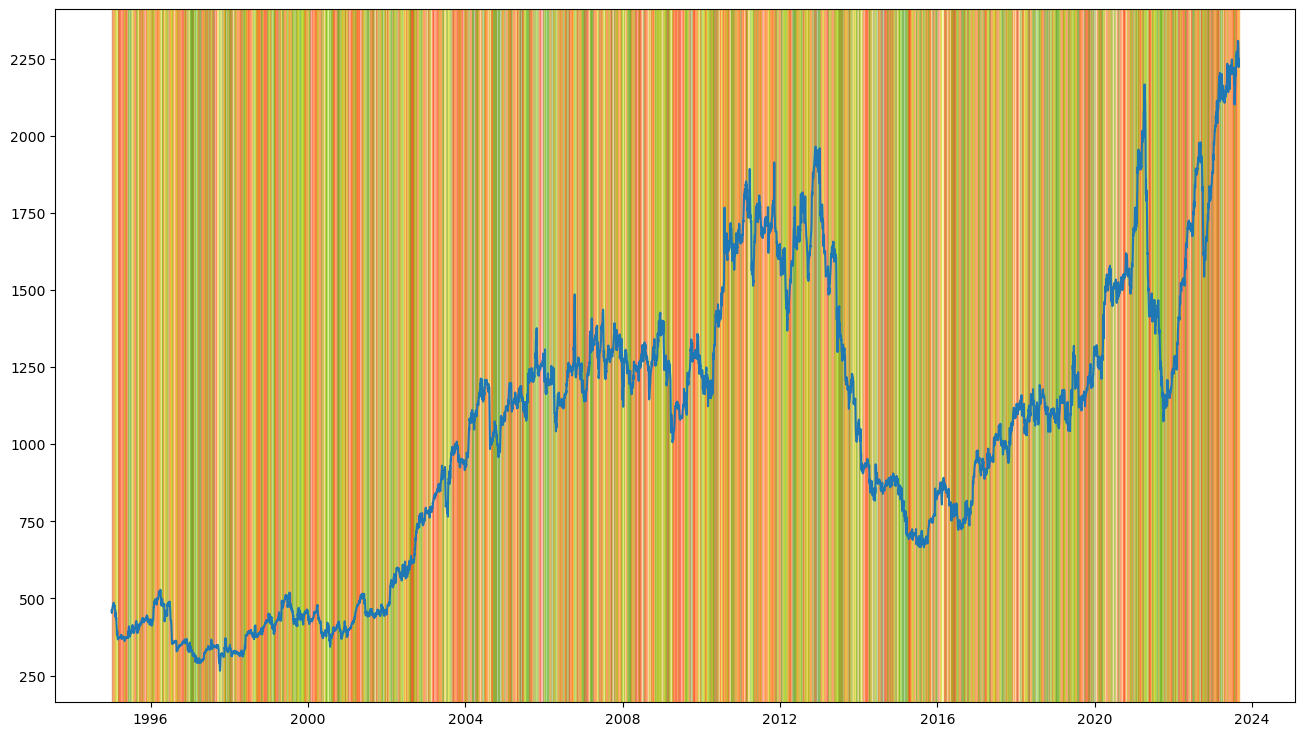

In [14]:
# sim_df = spx_model.simulate(return_df=True)
sim_df = spx_model.simulate(spx_data.loc[spx_data.index[0], 'Close'], spx_data.index)

In [23]:
r_df = create_df_from_yf(sim_df, sim_df.index[0], sim_df.index[-1]+pd.Timedelta(days=1), predict_t_plus_1=predict_t_plus_1, log_return=log_return)
vix = vix_model.predict(r_df, window).numpy()
vix = list(np.zeros(window-1)) + list(vix)
sim_df['VIX'] = vix

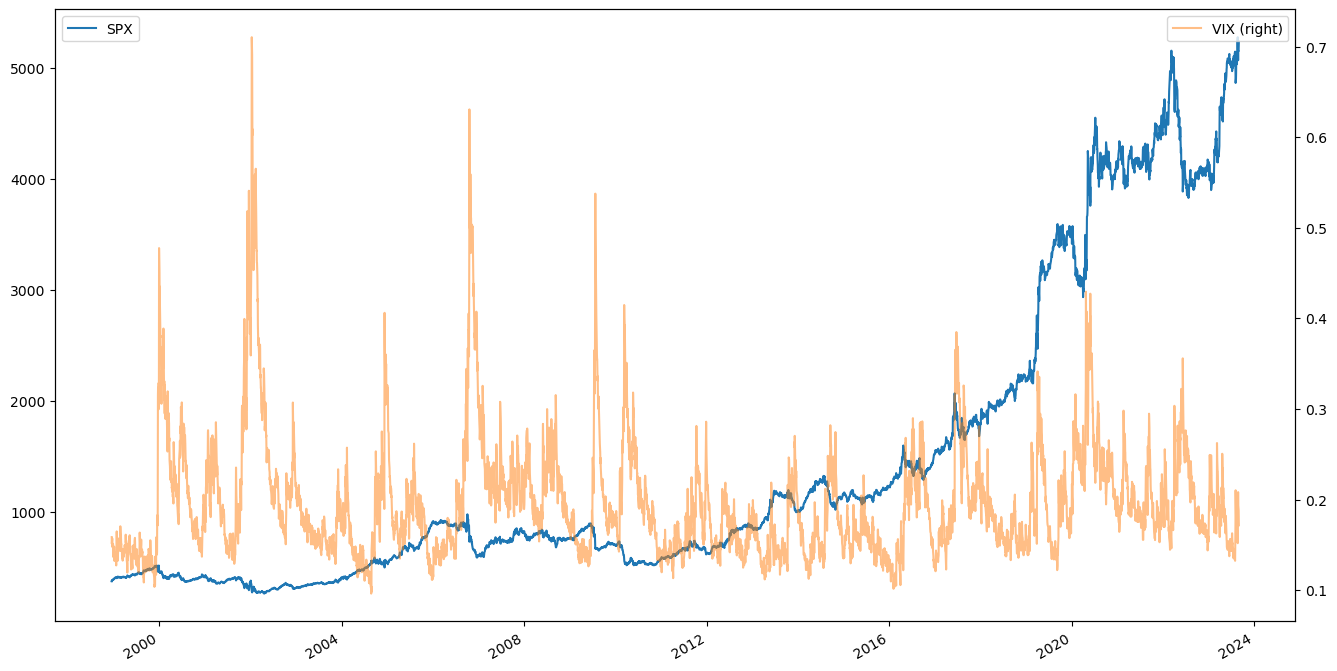

In [24]:
fig, ax = plt.subplots(figsize=(16,9))
sim_df.columns = ['SPX', 'VIX']
sim_df.loc[sim_df.index[window-1:], 'SPX'].plot(ax=ax)
sim_df.loc[sim_df.index[window-1:], 'VIX'].plot(ax=ax, secondary_y=True, alpha=0.5)
ax.legend(loc='upper left')
plt.legend()

# Save data

In [26]:
sim_df.to_csv('./data/sim_df_v1.csv')